# Experiment Overview: Free Trial Screener

### Course Overview Page

1. **Start Free Trial**
- ask for time devoted per week
    - if >5h -> credit card info -> charged after 14 days
    - if <=5h -> suggest to 'Access Course Materials'

2. **Access Course Materials**
- access materials for free  
- no coaching, no certificate, no project submission and feedback

### Hypothesis

Set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. 

If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

### unit of diversion: cookie
Although if the student enrolls in the free trial, they are tracked by user-id from that point forward.   

The same user-id cannot enroll in the free trial twice. 

For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

# Experiment Design
## Metirc Choice

Any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.

- Number of cookies: That is, number of unique cookies to view the course overview page. (dmin=3000)
- Number of user-ids: That is, number of users who enroll in the free trial. (dmin=50)
- Number of clicks: That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). (dmin=240)
- Click-through-probability: That is, number of unique cookies to click the "Start free trial" button divided by number of unique cookies to view the course overview page. (dmin=0.01)
- Gross conversion: That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start free trial" button. (dmin= 0.01)
- Retention: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)
- Net conversion: That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start free trial" button. (dmin= 0.0075)

### Invariant Metircs
1. Number of cookies: overall population is same
2. Number of clicks: population invariance, to make sure there’s relatively same number of cookies in each groups
3. Click-through-probability

### Evaluation Metrics
1. Gross conversion: to check if the suggestion will reduce the number of people who wants to enroll the free trial
2. Net conversion: check whether the change would influence the number of clients who pass the free trial but still enrolled

## Mearsuing Variability

### Baseline Values

In [1]:
cookies_page_day = 40000
cookies_click_freetrial_day = 3200
enrollments_day = 660
ctp_freetrial = 0.08
enroll_prob_click = 0.20625 #Probability of enrolling, given click
payment_prob_enroll = 0.53 #Probability of payment, given enroll:
payment_prob_click = 0.1093125 #Probability of payment, given click

### Evaluation Metrics

In [2]:
gross_conversion = enrollments_day/cookies_click_freetrial_day
print('Gross Conversion', round(gross_conversion,4))

net_conversion = payment_prob_enroll*enrollments_day/cookies_click_freetrial_day
print('Net Conversion:', round(net_conversion,4))

Gross Conversion 0.2062
Net Conversion: 0.1093


### Standard Deviation

In [3]:
import math

n = 5000
gross_conversion_n = cookies_click_freetrial_day/cookies_page_day * n
net_conversion_n = cookies_click_freetrial_day/cookies_page_day * n

def get_sd(prob, size):
    return math.sqrt(prob * (1-prob) / size)

gross_conversion_sd = get_sd(gross_conversion, gross_conversion_n)
print('SD of Gross Conversion:', round(gross_conversion_sd,4))

net_conversion_sd = get_sd(net_conversion, net_conversion_n)
print('SD of Net Conversion:', round(net_conversion_sd,4))

SD of Gross Conversion: 0.0202
SD of Net Conversion: 0.0156


## Sizing

### Choosing Number of Samples given Power

Using the analytic estimates of variance, how many pageviews total (across both groups) would you need to collect to adequately power the experiment? 

In [4]:
alpha = 0.05
beta = 0.2

https://www.evanmiller.org/ab-testing/sample-size.html

In [5]:
gross_conversion_size = 25835 #per click
gross_conversion_total_click = gross_conversion_size * 2
gross_conversion_total_page = gross_conversion_total_click / (cookies_click_freetrial_day / cookies_page_day)
print('Total Pageviews for Gross Conversion:', int(gross_conversion_total_page))

net_conversion_size = 27413 # per click
net_conversion_total_click = net_conversion_size * 2
net_conversion_total_page = net_conversion_total_click / (cookies_click_freetrial_day / cookies_page_day)
print('Total Pageviews for Net Conversion:', int(net_conversion_total_page))

Total Pageviews for Gross Conversion: 645875
Total Pageviews for Net Conversion: 685325


The total pageviews for the study should be 685325 if two metrics run independently

#### Bonferroni correction

In [6]:
alpha_individual = alpha / 2
round(alpha_individual, 4)

0.025

Too small -> need a lot of pages -> too consevative

### Choosing Duration vs. Exposure
What percentage of Udacity's traffic would you divert to this experiment (assuming there were no other experiments you wanted to run simultaneously)? Is the change risky enough that you wouldn't want to run on all traffic?


Given the percentage you chose, how long would the experiment take to run, using the analytic estimates of variance? If the answer is longer than a few weeks, then this is unreasonably long, and you should reconsider an earlier decision.

In [7]:
import numpy as np

traffic_percentage_list = np.arange(0.1,1.1,0.1)
#the retention and 
total_page = 685325

duration = []
for traffic_percentage in traffic_percentage_list:
    duration.append(total_page / (cookies_page_day * traffic_percentage))

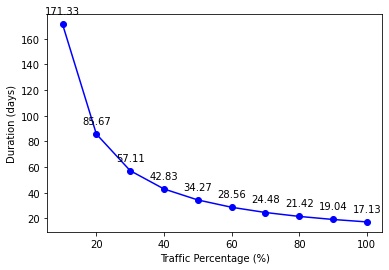

In [8]:
import matplotlib.pyplot as plt

plt.plot(traffic_percentage_list * 100,duration, 'bo-')

for x,y in zip(traffic_percentage_list * 100,duration):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.xlabel('Traffic Percentage (%)')
plt.ylabel('Duration (days)')
plt.show()

Choosing 90% and run the experiment for 20 days

Although there's no other experiments running at the same time, but it is usually not safe to put all (100%) of traffic into consideration, because 1)not too much days difference for 90% and 100%, 2)if put all traffic, cannot tell if other issues affect the results

# Experiment Analysis

## Sanity Cheaks

For each of your invariant metrics, give the 95% confidence interval for the value you expect to observe, the actual observed value, and whether the metric passes your sanity check. 

For any sanity check that did not pass, explain your best guess as to what went wrong based on the day-by-day data. Do not proceed to the rest of the analysis unless all sanity checks pass.

In [9]:
import pandas as pd
control = pd.read_csv('Final Project Results - Control.csv')
exp = pd.read_csv('Final Project Results - Experiment.csv')

- Pageviews: Number of unique cookies to view the course overview page that day.
- Clicks: Number of unique cookies to click the course overview page that day.
- Enrollments: Number of user-ids to enroll in the free trial that day.
- Payments: Number of user-ids who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

In [10]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [11]:
exp.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [12]:
control.shape, exp.shape

((37, 5), (37, 5))

#### Number of Clicks

In [13]:
control_clicks = sum(control['Clicks'])
exp_clicks = sum(exp['Clicks'])
clicks_sd = math.sqrt(0.5 * 0.5 /(control_clicks + exp_clicks))
m = 1.96 * clicks_sd
CI_clicks = (round((0.5- m),4), round((0.5+m),4))
clicks_hat = control_clicks / (control_clicks + exp_clicks)

print('Expected value of clicks: 0.5')
print('Observed value of clicks:', round(clicks_hat, 4))
print('The 95% Confidence Interval of Clicks:', CI_clicks)

Expected value of clicks: 0.5
Observed value of clicks: 0.5005
The 95% Confidence Interval of Clicks: (0.4959, 0.5041)


#### Number of cookies

In [55]:
con_cookie = sum(control['Pageviews'])
exp_cookie = sum(exp['Pageviews'])
cookies_sd = math.sqrt(0.5*0.5/(con_cookie + exp_cookie))
m_cookies = cookies_sd * 1.96
ci_cookies = (round((0.5 - m_cookies),4), round((0.5 + m_cookies), 4))
cookies_hat = con_cookie /(con_cookie + exp_cookie)

print('Expected value of cookies: 0.5')
print('Observed value of cookies:', round(cookies_hat, 4))
print('The 95% Confidence Interval of cookies:', ci_cookies)

Expected value of cookies: 0.5
Observed value of cookies: 0.5006
The 95% Confidence Interval of cookies: (0.4988, 0.5012)


#### Click-through-probability

In [59]:
ctp_con = control_clicks/con_cookie
ctp_exp = exp_clicks/exp_cookie

p_pool_ctp = (control_clicks+exp_clicks)/(con_cookie+exp_cookie)
sd_ctp = math.sqrt(p_pool_ctp * (1-p_pool_ctp)*(1/con_cookie + 1/exp_cookie))
m_ctp = 1.96 * sd_ctp
ci_ctp = (round(-m_ctp,4), round(m_ctp,4))
ctp_hat = ctp_exp - ctp_con

print('Expected value of Click-through-probability: 0')
print('Observed value of Click-through-probability:', round(ctp_hat, 4))
print('The 95% Confidence Interval of Click-through-probability:', ci_ctp)

Expected value of Click-through-probability: 0
Observed value of Click-through-probability: 0.0001
The 95% Confidence Interval of Click-through-probability: (-0.0013, 0.0013)


Passed the sanity check

## Results Analysis

### Effect Size Tests

For each of your evaluation metrics, give a 95% confidence interval around the difference between the experiment and control groups. Indicate whether each metric is statistically and practically significant. 

 A metric is statistically significant if the confidence interval does not include 0 (that is, you can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, you can be confident there is a change that matters to the business.)


If you have chosen multiple evaluation metrics, you will need to decide whether to use the Bonferroni correction. When deciding, keep in mind the results you are looking for in order to launch the experiment. Will the fact that you have multiple metrics make those results more likely to occur by chance than the alpha level of 0.05?



#### Gross Conversion

In [14]:
#check missing values
control

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0
5,"Thu, Oct 16",9670,823,138.0,82.0
6,"Fri, Oct 17",9008,748,146.0,76.0
7,"Sat, Oct 18",7434,632,110.0,70.0
8,"Sun, Oct 19",8459,691,131.0,60.0
9,"Mon, Oct 20",10667,861,165.0,97.0


In [15]:
GC_dmin = 0.01
n = 23
con_clicks_sub = sum(control['Clicks'][:n])
exp_clicks_sub = sum(exp['Clicks'][:n])
con_enroll = sum(control['Enrollments'][:n])
exp_enroll = sum(exp['Enrollments'][:n])

GC_con = con_enroll / con_clicks_sub
GC_exp = exp_enroll / exp_clicks_sub
GC_hat = GC_exp - GC_con

p_pool_gc = (con_enroll+exp_enroll)/(con_clicks_sub +exp_clicks_sub)
se_pool_gc = math.sqrt(p_pool_gc * (1-p_pool_gc)*(1/con_clicks_sub + 1/exp_clicks_sub))
m_gc = 1.96 * se_pool_gc
ci_gc_l = GC_hat-m_gc
ci_gc_u = GC_hat+m_gc
CI_GC = (round(ci_gc_l,4), round(ci_gc_u, 4))

print('Expected value of Gross Conversion: 0')
print('Observed value of Gross Conversion:', round(GC_hat, 4))
print('The 95% Confidence Interval of Gross Conversion:', CI_GC)

Expected value of Gross Conversion: 0
Observed value of Gross Conversion: -0.0206
The 95% Confidence Interval of Gross Conversion: (-0.0291, -0.012)


The 95% CI does not include 0 -> statistically significant   
The 95% CI does not include 0.01 or -0.01 (practical significance boundary) -> practically significant

#### Net Conversion

In [43]:
NC_dmin = 0.0075

con_pay = sum(control['Payments'][:n])
exp_pay = sum(exp['Payments'][:n])

NC_con = con_pay / con_clicks_sub
NC_exp = exp_pay / exp_clicks_sub
NC_hat = NC_exp - NC_con

p_pool_nc = (con_pay+exp_pay)/(con_clicks_sub +exp_clicks_sub)
se_pool_nc = math.sqrt(p_pool_nc * (1-p_pool_nc)*(1/con_clicks_sub + 1/exp_clicks_sub))
m_nc = 1.96 * se_pool_nc
ci_nc_l = NC_hat-m_nc
ci_nc_u = NC_hat+m_nc
CI_nc = (round(ci_nc_l,4), round(ci_nc_u, 4))

print('Expected value of Net Conversion: 0')
print('Observed value of Net Conversion:', round(NC_hat, 4))
print('The 95% Confidence Interval of Net Conversion:', CI_nc)

Expected value of Net Conversion: 0
Observed value of Net Conversion: -0.0049
The 95% Confidence Interval of Net Conversion: (-0.0116, 0.0019)


The 95% CI does includes 0 -> not statistically significant  
The 95% CI does includes -0.0075 (practical significance boundary) -> not practically significant

**Bonferroni correction ?**
No, at least one of the matrix is not significant -> no need to check conversative sitiations

### Sign Test

For each evaluation metric, do a sign test using the day-by-day breakdown. If the sign test does not agree with the confidence interval for the difference, see if you can figure out why.

https://www.graphpad.com/quickcalcs/binomial1/

In [32]:
control['Gross Conversion'] = control['Enrollments']/control['Clicks']
control['Net Conversion'] = control['Payments']/control['Clicks']
exp['Gross Conversion'] = exp['Enrollments']/exp['Clicks']
exp['Net Conversion'] = exp['Payments']/exp['Clicks']

In [33]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments,Gross Conversion,Net Conversion
0,"Sat, Oct 11",7723,687,134.0,70.0,0.195051,0.101892
1,"Sun, Oct 12",9102,779,147.0,70.0,0.188703,0.089859
2,"Mon, Oct 13",10511,909,167.0,95.0,0.183718,0.104510
3,"Tue, Oct 14",9871,836,156.0,105.0,0.186603,0.125598
4,"Wed, Oct 15",10014,837,163.0,64.0,0.194743,0.076464


In [34]:
exp.head()

,Date,Pageviews,Clicks,Enrollments,Payments,Gross Conversion,Net Conversion
0,"Sat, Oct 11",7716,686,105.0,34.0,0.153061,0.049563
1,"Sun, Oct 12",9288,785,116.0,91.0,0.147771,0.115924
2,"Mon, Oct 13",10480,884,145.0,79.0,0.164027,0.089367
3,"Tue, Oct 14",9867,827,138.0,92.0,0.166868,0.111245
4,"Wed, Oct 15",9793,832,140.0,94.0,0.168269,0.112981


#### Gross Conversion

In [36]:
gc_sign = pd.DataFrame()
gc_sign['diff'] = exp['Gross Conversion'] - control['Gross Conversion']
gc_sign = gc_sign.dropna()

In [38]:
#check if it was in 95%CI
gc_sign['success'] = (gc_sign['diff'] > ci_gc_l) & (gc_sign['diff'] < ci_gc_u)

In [40]:
gc_sign['success'].value_counts()

False    17
True      6
Name: success, dtype: int64

According to Sign Test, two tail p-value = 0.0347 < 0.05 -> statistically significant

#### Net Conversion

In [50]:
nc_sign = pd.DataFrame()
nc_sign['diff'] = exp['Net Conversion'] - control['Net Conversion']
nc_sign = nc_sign.dropna()

nc_sign['success'] = (nc_sign['diff'] > ci_nc_l) & (nc_sign['diff'] < ci_nc_u)

nc_sign['success'].value_counts()

False    19
True      4
Name: success, dtype: int64

According to Sign Test, two tail p-value = 0.0026 < 0.05 -> statistically significant

Does not agree with CI conclusion -> deep dig

In [51]:
nc_sign['nc_con'] = control['Net Conversion'][:n]
nc_sign['nc_exp'] = exp['Net Conversion'][:n]

nc_sign['pay_con'] = control['Payments'][:n]
nc_sign['click_con'] = control['Clicks'][:n]
nc_sign['pay_exp'] = exp['Payments'][:n]
nc_sign['click_exp'] = exp['Clicks'][:n]

In [52]:
nc_sign.sort_values(['diff'])

,diff,success,nc_con,nc_exp,pay_con,click_con,pay_exp,click_exp
14,-0.064163,False,0.185239,0.121076,128.0,691,81.0,669
0,-0.052330,False,0.101892,0.049563,70.0,687,34.0,686
13,-0.046414,False,0.181278,0.134864,122.0,673,94.0,697
6,-0.045194,False,0.101604,0.056410,76.0,748,44.0,780
10,-0.038931,False,0.121107,0.082176,105.0,867,71.0,864
11,-0.022394,False,0.109785,0.087391,92.0,838,70.0,801
5,-0.022224,False,0.099635,0.077411,82.0,823,61.0,788
7,-0.015667,False,0.110759,0.095092,70.0,632,62.0,652
2,-0.015144,False,0.104510,0.089367,95.0,909,79.0,884
3,-0.014353,False,0.125598,0.111245,105.0,836,92.0,827


Reasons:  
    1) Net Conversion of some control groups are high -> relatively low number of click cookies or low number of payments that day  
    2) NC of some experiment groups are low -> low number of payments
    
-> the overall invariant metrics matched but the day-by-day invariance metrics did not match with two groups

**Bonferroni correction ?**

In [61]:
alpha_individual = alpha / 2
alpha_individual

0.025

Gross Conversion: p-value = 0.0347 > 0.025 -> not statistically significant  
Net Conversion: p-value = 0.0026 < 0.025 -> statistically significant

## Recommendation

**No Launch**

Because the overall hypothesis tests are not fully practically significant, and didn't match the sign tests results

# Follow-up Experiments

### How to Reduce Early Cancellations
If you wanted to reduce the number of frustrated students who cancel early in the course, what experiment would you try? Give a brief description of the change you would make, what your hypothesis would be about the effect of the change, what metrics you would want to measure, and what unit of diversion you would use. Include an explanation of each of your choices.

#### Experiment Overview  
Fully-refund after free trial within 7days, half-refund after free trial within 14 days   
At the end of free trial, reminder the user they can still in 7 days with no reason fully refund if they cancel subscription

#### Hypothesis
The calcellation rate at the end of free trial will decrease with more people enroll in the course fully paid

#### Unit of Diversion
cookies

#### Main Evaluation Metrics
Retention: number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. (dmin=0.01)